# Resultados Autoencoder Fashion-MNIST

In [134]:
!pip install torchinfo

In [135]:
import torch
from torch import nn #, optim
from torch.utils.data import Dataset, DataLoader
#from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

#from torchsummary import summary
from torchinfo import summary


from google.colab import drive

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

In [136]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [137]:
#!ls drive
#!ls
#!mkdir drive/MyDrive/saved_models

In [138]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # Primero convertimos los datos de entrada a un gran vector.
        self.flatten = nn.Flatten()
        # Luego generamos una secuencia de transformaciones que implementan las capas de la red.
        # Algunas capas consisten en transformaciones lineales, que incluyen parámetros.
        # Otras consisten en funciones de activación no lineales (en este caso de tipo ReLU), que no incluyen parámetros.
        # Los tamaños de las capas se especifican a travez de los tamaños de las transformaciones lineales.
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, hide_layer),
            nn.Dropout(p=0.1),
            nn.ReLU(),
            nn.Linear(hide_layer, 28*28),
        )

    def forward(self, x):
        # Este método es usado internamente para transformar inputs en outputs en las fases forward.
        # Al igual que antes, aplanamos los datos de entrada en un gran vector.
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [139]:
# Creamos una subclase de Dataset que nos sirva para muestrear imagenes en el entrenamiento del autoencoder
class CustomImageDataset(Dataset):
    def __init__(self,dataset):
        self.dataset=dataset
    # Redefinimos el método .__len__()
    def __len__(self):
        return len(self.dataset)
    # Redefinimos el método .__getitem__()
    def __getitem__(self,i):
        image,label=self.dataset[i]
        label=torch.flatten(image) # Reescribimos el label original con una version achatada de la imagen.
        return image,label

In [140]:
pd.read_csv("/content/drive/MyDrive/saved_models/loss_ds_hl512_ep200_btch1000_Adam.csv")

Unnamed: 0     train      test
0             0  0.218768  0.218843
1             1  0.024001  0.023956
2             2  0.017428  0.017449
3             3  0.014996  0.015027
4             4  0.012713  0.012748
..          ...       ...       ...
196         196  0.004070  0.004236
197         197  0.004213  0.004377
198         198  0.004179  0.004352
199         199  0.004377  0.004553
200         200  0.004110  0.004277

[201 rows x 3 columns]

In [141]:
loss_ds = []
for hide in [64, 128, 256, 512]:
  loss_ds.append(pd.read_csv("/content/drive/MyDrive/saved_models/loss_ds_hl{}_ep200_btch1000_Adam.csv".format(hide)))
#loss_ds

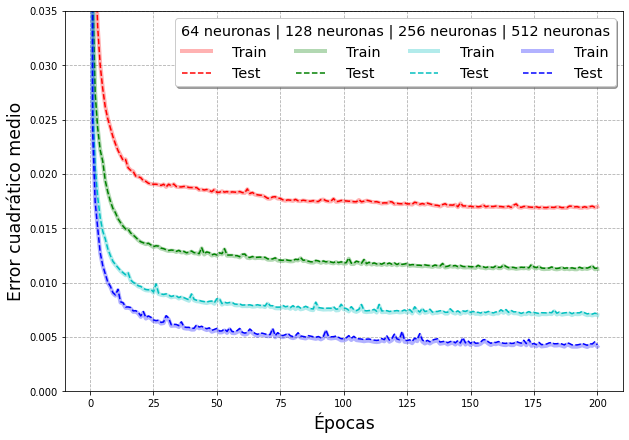

In [142]:
h_lay = [64, 128, 256, 512]
plt.figure(figsize=(10, 7))
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['r', 'r', 'g', 'g', 'c', 'c', 'b', 'b']) 
for i, loss in enumerate(loss_ds):
  plt.plot(loss['train'], '-', label='Train', lw=4, alpha=0.3)
  plt.plot(loss['test'], '--', label='Test')
plt.legend(
    title='{} neuronas | {} neuronas | {} neuronas | {} neuronas'.format(*[x for x in h_lay]), 
    ncol=4, 
    handletextpad=1.5,
    fontsize='x-large',
    title_fontsize='x-large',
    shadow=True)
plt.xlabel('Épocas', fontsize='xx-large')
plt.ylabel('Error cuadrático medio', fontsize='xx-large')
plt.grid(ls='--')
plt.ylim(0, 0.035)
plt.savefig('/content/drive/MyDrive/saved_models/fig_loss_4.pdf')
plt.show()

In [143]:
hide_layer = 64

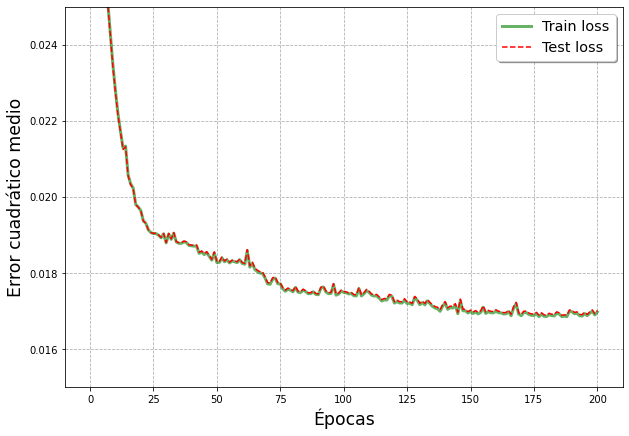

In [144]:
ind = h_lay.index(hide_layer)
plt.figure(figsize=(10, 7))
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['g', 'r']) 
plt.plot(loss_ds[ind]['train'], '-', label='Train loss', lw=3, alpha=0.6)
plt.plot(loss_ds[ind]['test'], '--', label='Test loss')
plt.legend(
    fontsize='x-large',
    title_fontsize='x-large',
    shadow=True)
plt.xlabel('Épocas', fontsize='xx-large')
plt.ylabel('Error cuadrático medio', fontsize='xx-large')
plt.grid(ls='--')
#plt.ylim(0.0166, 0.0171)
plt.ylim(0.015, 0.025)
plt.savefig('/content/drive/MyDrive/saved_models/fig_loss.pdf')
plt.show()

In [145]:
#torch.save(model.state_dict(), "/content/drive/MyDrive/saved_models/model_hl{}_ep200_btch1000_Adam.pt".format(hide_layer))

In [146]:
model = NeuralNetwork()#.to(device)
model.load_state_dict(
    torch.load(
        "/content/drive/MyDrive/saved_models/model_hl{}_ep200_btch1000_Adam.pt".format(hide_layer), 
        map_location=torch.device('cpu')
        )
    )
#model.eval()

<All keys matched successfully>

In [147]:
summary(model, input_size=(1000, 1, 28, 28))
#summary(model,(1,28,28), 1000)
#print(model)

Layer (type:depth-idx)                   Output Shape              Param #
NeuralNetwork                            --                        --
├─Flatten: 1-1                           [1000, 784]               --
├─Sequential: 1-2                        [1000, 784]               --
│    └─Linear: 2-1                       [1000, 64]                50,240
│    └─Dropout: 2-2                      [1000, 64]                --
│    └─ReLU: 2-3                         [1000, 64]                --
│    └─Linear: 2-4                       [1000, 784]               50,960
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
Total mult-adds (M): 101.20
Input size (MB): 3.14
Forward/backward pass size (MB): 6.78
Params size (MB): 0.40
Estimated Total Size (MB): 10.32

In [148]:
# La primera vez esto tarda un rato ya que tiene que bajar los datos de la red.

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [149]:
my_train_ds = CustomImageDataset(training_data)
my_test_ds = CustomImageDataset(test_data)

test id: 8789
test id: 7742
test id: 721


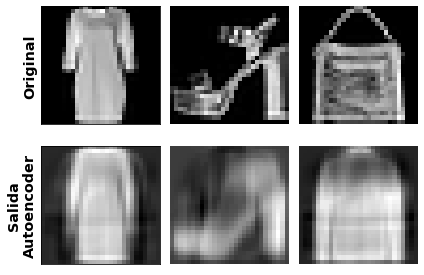

In [150]:
# Elegimos imagenes y calculamos la correspondiente prediccion generada por el modelo.
fig,axes=plt.subplots(2,3)
fig.set_size_inches(6,4)

for i in range(3):
  sample_idx = torch.randint(len(my_test_ds),size=(1,)).item()
  imagen,label = my_test_ds[sample_idx]
  #print(f"imagen.shape={imagen.shape}")
  #imagen_gpu = imagen.to(device)
  print('test id: {}'.format(sample_idx))
  pred = model(imagen)
  pred = pred.detach().numpy().reshape((1,28,28))

  # Ploteamos una imagen y la correspondiente generada por el modelo.
  ax = axes[0][i]
  ax.axis("off")
  ax.imshow(imagen.squeeze(),cmap="gray")
  ax = axes[1][i]
  ax.axis("off")
  ax.imshow(pred.squeeze(),cmap="gray")
#axes[0][0].set_title("Original", fontsize='x-large', fontweight='bold')
#axes[0][1].set_title("Salida\nAutoencoder", fontsize='x-large', fontweight='bold')
axes[0][0].set_ylabel("Original", fontsize='x-large', fontweight='bold')
axes[0][0].axis('on')
axes[0][0].set_xticks([])
axes[0][0].set_yticks([])
axes[1][0].set_ylabel("Salida\nAutoencoder", fontsize='x-large', fontweight='bold')
axes[1][0].axis('on')
axes[1][0].set_xticks([])
axes[1][0].set_yticks([])
fig.tight_layout()
plt.savefig('/content/drive/MyDrive/saved_models/fig_autoencoder.pdf')
plt.show()

In [151]:
model = {}
for i in [64, 128, 256, 512]:
  hide_layer = i
  model[i] = NeuralNetwork()#.to(device)
  model[i].load_state_dict(
      torch.load(
          "/content/drive/MyDrive/saved_models/model_hl{}_ep200_btch1000_Adam.pt".format(hide_layer), 
          map_location=torch.device('cpu')
          )
      )

id: {} 4363


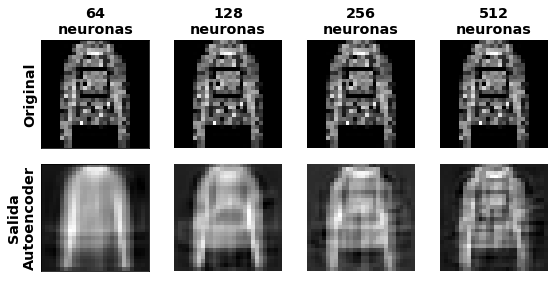

In [152]:
fig,axes=plt.subplots(2,4)
fig.set_size_inches(8,4)

sample_idx = torch.randint(len(my_test_ds),size=(1,)).item()
#sample_idx = 8463
print('id: {}',format(sample_idx))

for i, index in enumerate([64, 128, 256, 512]):
  imagen,label = my_test_ds[sample_idx]
  #print(f"imagen.shape={imagen.shape}")
  #imagen_gpu = imagen.to(device)
  #print('test id: {}'.format(sample_idx))
  pred = model[index](imagen)
  pred = pred.detach().numpy().reshape((1,28,28))

  # Ploteamos una imagen y la correspondiente generada por el modelo.
  ax = axes[0][i]
  ax.axis("off")
  ax.imshow(imagen.squeeze(),cmap="gray")
  ax = axes[1][i]
  ax.axis("off")
  ax.imshow(pred.squeeze(),cmap="gray")

axes[0][0].set_title("64\nneuronas", fontsize='x-large', fontweight='bold')
axes[0][1].set_title("128\nneuronas", fontsize='x-large', fontweight='bold')
axes[0][2].set_title("256\nneuronas", fontsize='x-large', fontweight='bold')
axes[0][3].set_title("512\nneuronas", fontsize='x-large', fontweight='bold')

axes[0][0].set_ylabel("Original", fontsize='x-large', fontweight='bold')
axes[0][0].axis('on')
axes[0][0].set_xticks([])
axes[0][0].set_yticks([])
axes[1][0].set_ylabel("Salida\nAutoencoder", fontsize='x-large', fontweight='bold')
axes[1][0].axis('on')
axes[1][0].set_xticks([])
axes[1][0].set_yticks([])
fig.tight_layout()
plt.savefig('/content/drive/MyDrive/saved_models/fig_pred_all.pdf')
plt.show()
